## Import the packages that will used in the course of this project

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## In this project, we want to test for the correlation between student performance and their anxiety level during an examination

## Read the dataset into a dataframe called 'exam'

In [40]:
exam=pd.read_excel("C:\\Users\\Feranmi Favour\\Desktop\\Data Analysis & Science\\Zacrac\\data\\Exam Anxiety.xlsx")
exam.head()

,Code,Revise,Exam,Anxiety,Gender
0,1,4,40,86.30,1
1,3,27,80,70.18,1
2,4,53,80,61.31,1
3,5,4,40,89.52,1
4,11,18,45,79.04,1


## Replacing the value of 1 & 2 with Male & Female respectively in the gender column 

In [41]:
exam['Gender'].replace({1:'Male',2:'Female'},inplace=True)

In [42]:
exam.head(10)

,Code,Revise,Exam,Anxiety,Gender
0,1,4,40,86.30,Male
1,3,27,80,70.18,Male
2,4,53,80,61.31,Male
3,5,4,40,89.52,Male
4,11,18,45,79.04,Male
5,12,16,85,80.66,Male
6,13,13,70,70.18,Male
7,15,98,95,34.71,Male
8,16,1,70,95.16,Male
9,17,14,95,75.82,Male


## Checking for the dataframe overall information

In [43]:
exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Code     103 non-null    int64  
 1   Revise   103 non-null    int64  
 2   Exam     103 non-null    int64  
 3   Anxiety  103 non-null    float64
 4   Gender   103 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 4.1+ KB


## To check for null values in the dataframe

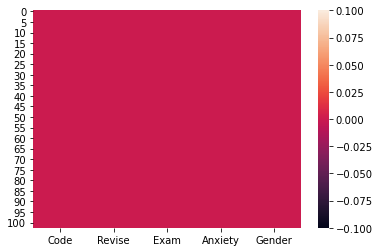

In [44]:
sns.heatmap(exam.isnull())

## To obtain the central tendency and distribution of each column

In [45]:
exam.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Code,103.0,52.000000,29.877528,1.00,26.500,52.00,77.50,103.00
Revise,103.0,19.854369,18.159105,0.00,8.000,15.00,23.50,98.00
Exam,103.0,56.572816,25.940581,2.00,40.000,60.00,80.00,100.00
Anxiety,103.0,74.343495,17.181773,0.06,69.775,79.04,84.69,97.58


## The distribution plot of "Anxiety"

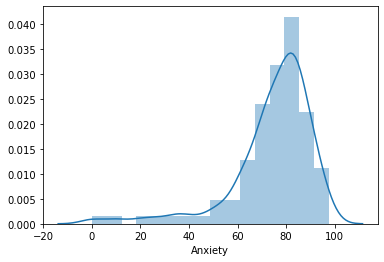

In [46]:
sns.distplot(exam['Anxiety'])

## Remove the 'Code' column

In [47]:
exam.drop('Code',axis=1,inplace=True)

## The joint plot of "Anxiety" and "Exam"

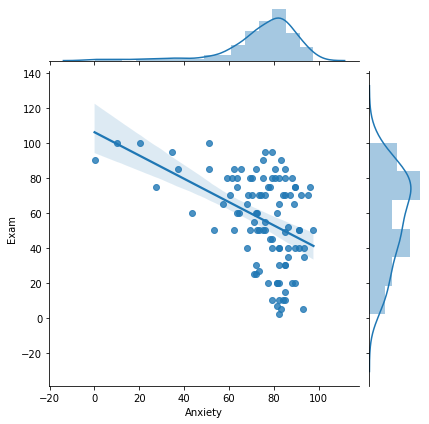

In [49]:
sns.jointplot(exam['Anxiety'],exam['Exam'],kind='reg')

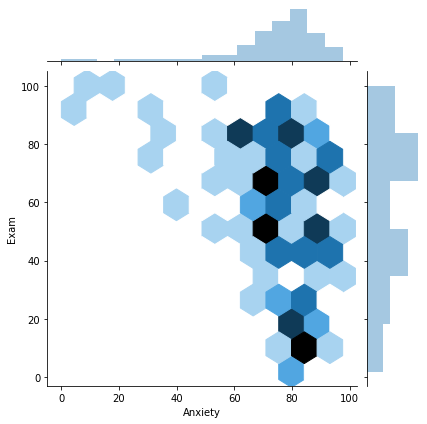

In [50]:
sns.jointplot(exam['Anxiety'],exam['Exam'],kind='hex')

## Assigning the numerical values of the data into another dataframe called "exam_num"

In [51]:
exam_num=exam[['Anxiety','Exam','Revise']]

## Obtaining the correlation cooeficients of the dataframe "exam"

In [52]:
exam_cor=exam.corr()
exam_cor

,Revise,Exam,Anxiety
Revise,1.000000,0.396721,-0.709263
Exam,0.396721,1.000000,-0.441004
Anxiety,-0.709263,-0.441004,1.000000


## Heatmap of 'exam'

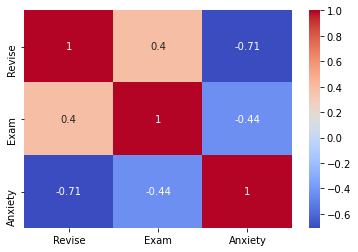

In [53]:
sns.heatmap(exam_cor,cmap='coolwarm',annot=True)

## Importing some statistical packages for correlation module

In [54]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

## Importing some statistical packages for Normality Module Test

In [55]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

## Test for Normality in "Anxiety"

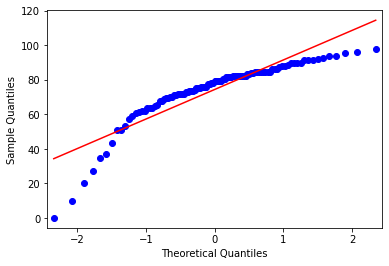

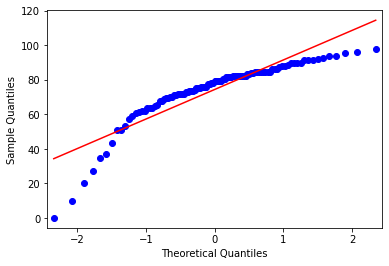

In [57]:
qqplot(exam["Anxiety"],line='s')


## Test for Normality in "Exam"

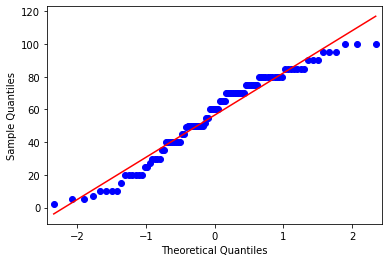

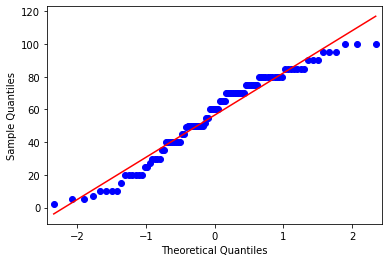

In [58]:
qqplot(exam["Exam"],line='s')

## To get the test statistic and p-value of "Anxiety"

In [59]:
shapiro(exam['Anxiety'])

ShapiroResult(statistic=0.8224279284477234, pvalue=8.652522587304645e-10)

## To get the test statistic and p-value of "Exam"

In [60]:
shapiro(exam['Exam'])

ShapiroResult(statistic=0.9551575183868408, pvalue=0.00152147829066962)

## To get the test statistic and p-value of "Revise"

In [61]:
shapiro(exam['Revise'])

ShapiroResult(statistic=0.8044546246528625, pvalue=2.2515996012106854e-10)

## Correlation Test for "Anxiety" and "Exam" using Pearson correlation coefficient 'r' 

In [64]:
corr,p_value=pearsonr(exam['Anxiety'],exam['Exam'])
print (f'Correlation coefficient r = {corr:.3f},p-value = {p_value:.3f}.')

Correlation coefficient r = -0.441,p-value = 0.000.


## Interpretation of result

### The correlation coefficient r between student performance in exam and anxiety level =-0.0441 and the p-value <0.01 at 95% C.I. two tailed test.Therefore, it can be concluded that there was negatively strong relationship betweem students performances in exams and their anxiety level. i.e. Increase in Anxiety level evaluates to decrease in exam performance and vice versa. In addition, the relationship was signigicant at p-value < 0.01.

## Correlation Test for "Revise" and "Exam" using Pearson correlation coefficient 'r' 

In [65]:
corr,p_value=pearsonr(exam['Revise'],exam['Exam'])
print (f'Correlation coefficient r = {corr:.3f},p-value = {p_value:.3f}.')

Correlation coefficient r = 0.397,p-value = 0.000.
